## Clustering 

### Importando librerias

In [2]:
# Importo paquetes y configuración
import numpy as np
import pandas as pd
import seaborn as sns
# configuración gráficos
import matplotlib.pyplot as plt
%matplotlib inline
# customizaciones
plt.rcParams['figure.figsize']= 12,6

# Importaciones de K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# SQL
import datetime as dt
import pandas.io.sql as psql
import cx_Oracle
import csv

### Conectar Oracle

In [3]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)
#con.close()

11.2.0.3.0


In [4]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
df = pd.read_sql_query('''

SELECT 
cast(de.COD_EMPRESA as integer) AS COD_EMPRESA,
de.NOMBRE,
dp.DESC_EMPRESA,
de.NUM_EMPLEADOS,
de.desc_INDUSTRIA,
CAST (avg((a.SCORE_WELL_DONE)*10) AS integer) AS score_post,
CAST (avg((a.SCORE_CANDIDATE_ATRACTIVE)*10) AS integer) AS score_candidate,
CAST (avg((a.SCORE_GOOD_COMPANY)*10) AS integer) AS score_empresa,
count(DISTINCT a.COD_PUBLICACION) AS publicaciones
FROM
	score_offers a
LEFT JOIN	
	DWHPRO.DIM_PUBLICACION dp ON a.COD_PUBLICACION = dp.COD_PUBLICACION AND dp.FLAG_ACTUAL = 1
LEFT JOIN	
	DWHPRO.DIM_EMPRESA de ON dp.COD_EMPRESA = de.COD_EMPRESA AND de.CLIENTE_PRUEBA IS NULL AND de.FLAG_ACTUAL = 1
LEFT JOIN
	EMPLEO_ES.OFERTAS o ON dp.COD_OFERTA = o.O_ID
WHERE 
a.FECHA_PUBLICACION_IJ >= to_date('20180101', 'yyyymmdd')
AND dp.COD_ESTADO = 1
GROUP BY
de.COD_EMPRESA,
de.NOMBRE,
dp.DESC_EMPRESA,
de.NUM_EMPLEADOS,
de.desc_INDUSTRIA

''', con)
df_save = df
df_save

,COD_EMPRESA,NOMBRE,DESC_EMPRESA,NUM_EMPLEADOS,DESC_INDUSTRIA,SCORE_POST,SCORE_CANDIDATE,SCORE_EMPRESA,PUBLICACIONES
0,8.600641e+09,T-SYSTEMS,T-SYSTEMS,514.0,Telecomunicaciones,64,35,70,69
1,8.600679e+09,HUDSON GLOBAL RESOURCES,HUDSON GLOBAL RESOURCES,25.0,Servicios de RRHH,74,53,60,27
2,1.724167e+12,"Tenerife Shipyards, S.A.","Tenerife Shipyards, S.A.",3.0,Naval,73,43,60,3
3,1.735474e+12,MECSA VALLES SL.,MECSA VALLES SL.,1.0,Construccion,60,60,100,1
4,8.600770e+09,Promopublic Promociones y Publicaciones,Promopublic Promociones y Publicaciones,14.0,"Publicidad, RRPP y eventos",85,40,75,2
5,8.600657e+09,ENGIE,ENGIE,700.0,Otras actividades,86,37,70,28
6,8.600625e+09,SELLBYTEL SL.,SELLBYTEL Group,2500.0,Otras actividades,76,49,70,31
7,8.600619e+09,SAYOS & CARRERA,SAYOS & CARRERA,30.0,Telecomunicaciones,85,35,90,2
8,8.600614e+09,"ARAMARK, Servicios de Catering","ARAMARK, Servicios de Catering",5000.0,Hosteleria y restaurantes,78,38,70,9
9,8.600930e+09,LINDE MATERIAL HANDLING IBERICA SA,LINDE MATERIAL HANDLING IBERICA SA,100.0,Maquinaria,79,40,71,8


In [5]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
df = pd.read_sql_query('''

SELECT 
	de.COD_EMPRESA,
	de.NOMBRE,
	s.importe_total AS importe_365,
	dp.COD_PUBLICACION AS post_365,
	CAST((s.importe_total/
	dp.COD_PUBLICACION) AS integer) AS ARPU_365
FROM
	DWHPRO.DIM_EMPRESA de 
inner JOIN	
	(
		SELECT count(dp.COD_PUBLICACION) AS COD_PUBLICACION , dp.COD_EMPRESA
		FROM 
		DWHPRO.DIM_PUBLICACION dp 
		WHERE dp.FECHA_PUBLICACION_IJ BETWEEN CURRENT_DATE -366 AND CURRENT_DATE -1
		AND dp.COD_ESTADO = 1
		AND dp.FLAG_ACTUAL = 1	
		GROUP BY 
		dp.COD_EMPRESA
	)dp ON dp.COD_EMPRESA = de.COD_EMPRESA
LEFT JOIN
	(--s
		SELECT	
			COD_EMPRESA,
			sum(s.importe) AS importe_total
		FROM	
			DWHPRO.FACT_ENTERPRISE_SALES s
		WHERE	
			to_date(s.FECHA_IMPUTACION, 'yyyymmdd') BETWEEN CURRENT_DATE -366 AND CURRENT_DATE -1
		GROUP BY
			s.COD_EMPRESA 
	)s
	ON de.COD_EMPRESA = s.COD_EMPRESA 
WHERE 
	de.FLAG_ACTUAL = 1
	AND de.CLIENTE_PRUEBA IS NULL

''', con)
df_save_2 = df
df_save_2

,COD_EMPRESA,NOMBRE,IMPORTE_365,POST_365,ARPU_365
0,8600622604,Grupo CT,26418.34,7,3774.0
1,9753982364,GRUPO VIAJABIEN,3017.00,3,1006.0
2,1735137951720,JORDAN-CURRY SL.,49.00,1,49.0
3,1720938946046,RECABA INVERSIONES TURISTICAS SOCIEDAD LIMITADA.,5952.00,7,850.0
4,11020436400,Remaned Equipos Diesel S.L.,1255.00,1,1255.0
5,1735100008906,TARANIS ENERGY SPAIN SL.,49.00,1,49.0
6,1735129945976,KORFLEX RELAX S.A.,697.00,3,232.0
7,1724640971470,colina invest sl,118.00,2,59.0
8,1714348769976,JC Consejeros,959.00,1,959.0
9,1727351515048,"Arete Gestion de Personas, S.L.",2387.55,2,1194.0


In [6]:
df_save_2 = df_save_2.merge(df_save,how='inner',on = 'COD_EMPRESA')

In [7]:
df_save_2

,COD_EMPRESA,NOMBRE_x,IMPORTE_365,POST_365,ARPU_365,NOMBRE_y,DESC_EMPRESA,NUM_EMPLEADOS,DESC_INDUSTRIA,SCORE_POST,SCORE_CANDIDATE,SCORE_EMPRESA,PUBLICACIONES
0,8600622604,Grupo CT,26418.34,7,3774.0,Grupo CT,Grupo CT,200.0,Servicios y tecnologia de la informacion,72,34,70,5
1,9753982364,GRUPO VIAJABIEN,3017.00,3,1006.0,GRUPO VIAJABIEN,GRUPO VIAJABIEN,15.0,Hosteleria y restaurantes,90,50,73,3
2,1735137951720,JORDAN-CURRY SL.,49.00,1,49.0,JORDAN-CURRY SL.,JORDAN-CURRY SL.,3.0,Actividades inmobiliarias,80,50,100,1
3,1720938946046,RECABA INVERSIONES TURISTICAS SOCIEDAD LIMITADA.,5952.00,7,850.0,RECABA INVERSIONES TURISTICAS SOCIEDAD LIMITADA.,RECABA INVERSIONES TURISTICAS SOCIEDAD LIMITADA.,3.0,Otras actividades,83,49,70,7
4,11020436400,Remaned Equipos Diesel S.L.,1255.00,1,1255.0,Remaned Equipos Diesel S.L.,Remaned Equipos Diesel S.L.,25.0,Maquinaria,90,40,70,1
5,1735100008906,TARANIS ENERGY SPAIN SL.,49.00,1,49.0,TARANIS ENERGY SPAIN SL.,TARANIS ENERGY SPAIN SL.,1.0,Arquitectura y planificacion,60,30,100,1
6,1735129945976,KORFLEX RELAX S.A.,697.00,3,232.0,KORFLEX RELAX S.A.,KORFLEX RELAX S.A.,1.0,Otras actividades,87,30,50,3
7,1724640971470,colina invest sl,118.00,2,59.0,colina invest sl,colina invest sl,40.0,Turismo,75,25,40,2
8,1714348769976,JC Consejeros,959.00,1,959.0,JC Consejeros,JC Consejeros,1.0,Otras actividades,80,60,80,1
9,1727351515048,"Arete Gestion de Personas, S.L.",2387.55,2,1194.0,"Arete Gestion de Personas, S.L.","Arete Gestion de Personas, S.L.",3.0,Servicios de RRHH,80,60,70,2


In [8]:
tabla = df_save
# Controlo cuantos datos tengos (filas, columnas)
tabla.shape

(14485, 9)

In [9]:
#checkeo si hay vacios
print(tabla.isnull().sum())

COD_EMPRESA        3
NOMBRE             3
DESC_EMPRESA       0
NUM_EMPLEADOS      3
DESC_INDUSTRIA     3
SCORE_POST         0
SCORE_CANDIDATE    0
SCORE_EMPRESA      0
PUBLICACIONES      0
dtype: int64


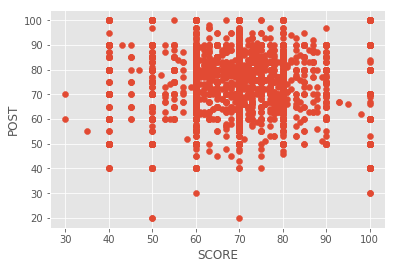

In [10]:
#Exploratory data analisis first: visualizar los datos
plt.scatter(tabla['SCORE_EMPRESA'], tabla['SCORE_POST'])
plt.xlabel('SCORE')
plt.ylabel('POST');

### K Means

In [11]:
# Tengo que formatear como numpy array para utilizar KMeans
data_v0 = np.asarray([np.asarray(tabla['SCORE_EMPRESA']),np.asarray(tabla['SCORE_POST'])]).T
data_v0

array([[ 70,  64],
       [ 60,  74],
       [ 60,  73],
       ...,
       [ 60,  80],
       [100,  70],
       [ 70,  70]])


### datos normalizados

In [12]:
scaler = StandardScaler()
scaler.fit(data_v0)

/anaconda3/envs/basic_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
data_scaled= scaler.transform(data_v0)
data_scaled

/anaconda3/envs/basic_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.23121469, -0.92466365],
       [-0.74072205, -0.07762789],
       [-0.74072205, -0.16233147],
       ...,
       [-0.74072205,  0.43059357],
       [ 1.2973074 , -0.41644219],
       [-0.23121469, -0.41644219]])

### Numero de Clusters

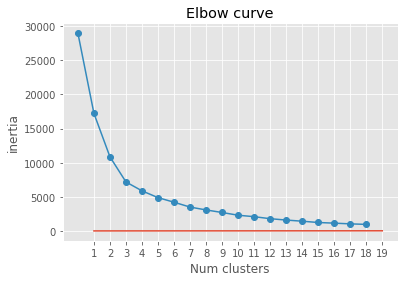

In [14]:
#Elbow curve
ks = range (1,20) # cantidad de clusters a testear
x = data_scaled

inertias=[]
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)
    
plt.plot(range(1, 20),ks, inertias, '-o')
plt.xlabel('Num clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid(True)
plt.title('Elbow curve');

In [15]:
model = KMeans(n_clusters=4)
model.fit(data_scaled)
print(model.inertia_)

7173.405850995919


In [16]:
model = KMeans(n_clusters=5)
model.fit(data_scaled)
print(model.inertia_)

5975.856663179957


### Grafico Clusters

Text(-2, -4, 'empresas Infojobs')

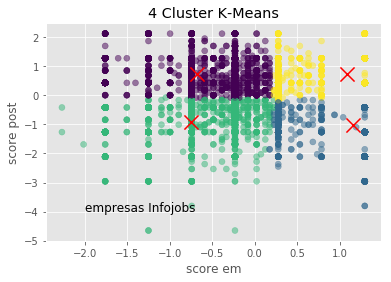

In [18]:
kmeans= KMeans(n_clusters=4,init='k-means++',max_iter=1000)
kmeansoutput=kmeans.fit(data_scaled)
centroides = kmeans.cluster_centers_
labels = kmeans.predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],c=labels,alpha= 0.5)
plt.scatter(centroides[:,0],centroides[:,1], c='red',marker= 'x', s=200)
plt.xlabel('score em')
plt.ylabel('score post')
plt.title('4 Cluster K-Means')
plt.text(-2, -4, 'empresas Infojobs', fontsize=12)
#plt.savefig('4 Clusters K-Means.png');

In [19]:
centroides

array([[-0.68436658,  0.74165298],
       [ 1.15793177, -1.00670962],
       [-0.74608379, -0.91928226],
       [ 1.08515159,  0.73606303]])

In [21]:
# convierto a df con Cod Empresa
clustering = pd.DataFrame({'Indice_Emp':tabla['COD_EMPRESA'],'Cluster':labels}).set_index('Indice_Emp')
clustering.head()

,Cluster
Indice_Emp,
8.600641e+09,2
8.600679e+09,0
1.724167e+12,2
1.735474e+12,1
8.600770e+09,0


In [22]:
# convierto a df con Index...
clustering_2 = pd.DataFrame({'Indice_Emp':tabla.index,'Cluster':labels}).set_index('Indice_Emp')
clustering_2.head()

,Cluster
Indice_Emp,
0,2
1,0
2,2
3,1
4,0


### Agrupar todo en una tabla

In [24]:
#Concatenar Tablas
clustering_results = pd.concat([clustering_2,tabla], axis=1)
clustering_results.head()

,Cluster,COD_EMPRESA,NOMBRE,DESC_EMPRESA,NUM_EMPLEADOS,DESC_INDUSTRIA,SCORE_POST,SCORE_CANDIDATE,SCORE_EMPRESA,PUBLICACIONES
Indice_Emp,,,,,,,,,,
0,2,8.600641e+09,T-SYSTEMS,T-SYSTEMS,514.0,Telecomunicaciones,64,35,70,69
1,0,8.600679e+09,HUDSON GLOBAL RESOURCES,HUDSON GLOBAL RESOURCES,25.0,Servicios de RRHH,74,53,60,27
2,2,1.724167e+12,"Tenerife Shipyards, S.A.","Tenerife Shipyards, S.A.",3.0,Naval,73,43,60,3
3,1,1.735474e+12,MECSA VALLES SL.,MECSA VALLES SL.,1.0,Construccion,60,60,100,1
4,0,8.600770e+09,Promopublic Promociones y Publicaciones,Promopublic Promociones y Publicaciones,14.0,"Publicidad, RRPP y eventos",85,40,75,2


In [28]:
clustering_results

,Cluster,COD_EMPRESA,NOMBRE,DESC_EMPRESA,NUM_EMPLEADOS,DESC_INDUSTRIA,SCORE_POST,SCORE_CANDIDATE,SCORE_EMPRESA,PUBLICACIONES
Indice_Emp,,,,,,,,,,
0,2,8.600641e+09,T-SYSTEMS,T-SYSTEMS,514.0,Telecomunicaciones,64,35,70,69
1,0,8.600679e+09,HUDSON GLOBAL RESOURCES,HUDSON GLOBAL RESOURCES,25.0,Servicios de RRHH,74,53,60,27
2,2,1.724167e+12,"Tenerife Shipyards, S.A.","Tenerife Shipyards, S.A.",3.0,Naval,73,43,60,3
3,1,1.735474e+12,MECSA VALLES SL.,MECSA VALLES SL.,1.0,Construccion,60,60,100,1
4,0,8.600770e+09,Promopublic Promociones y Publicaciones,Promopublic Promociones y Publicaciones,14.0,"Publicidad, RRPP y eventos",85,40,75,2
5,0,8.600657e+09,ENGIE,ENGIE,700.0,Otras actividades,86,37,70,28
6,0,8.600625e+09,SELLBYTEL SL.,SELLBYTEL Group,2500.0,Otras actividades,76,49,70,31
7,3,8.600619e+09,SAYOS & CARRERA,SAYOS & CARRERA,30.0,Telecomunicaciones,85,35,90,2
8,0,8.600614e+09,"ARAMARK, Servicios de Catering","ARAMARK, Servicios de Catering",5000.0,Hosteleria y restaurantes,78,38,70,9


### Plot por dimensiones

/anaconda3/envs/basic_env/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


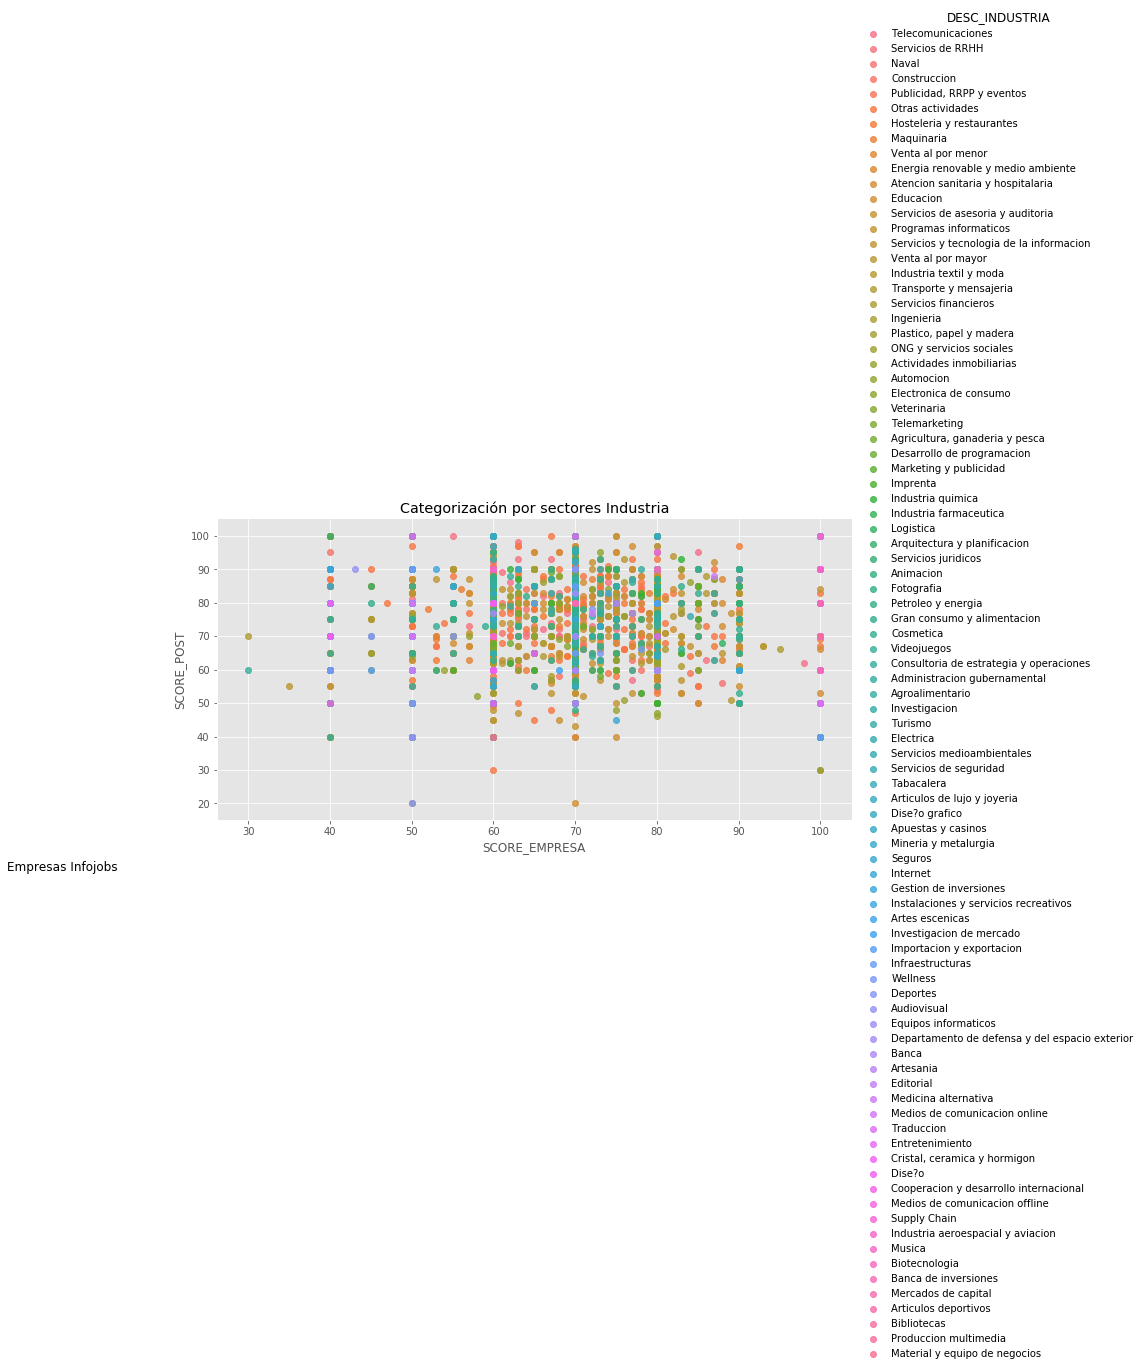

In [29]:
sns.lmplot(x='SCORE_EMPRESA', y='SCORE_POST', data= clustering_results,fit_reg=False, hue='DESC_INDUSTRIA', size=5, aspect=2
          )
plt.title('Categorización por sectores Industria')
plt.text(0.5, 0.05, 'Empresas Infojobs', fontsize=12)
plt.savefig('ScatterPlot_por_sectores.png');

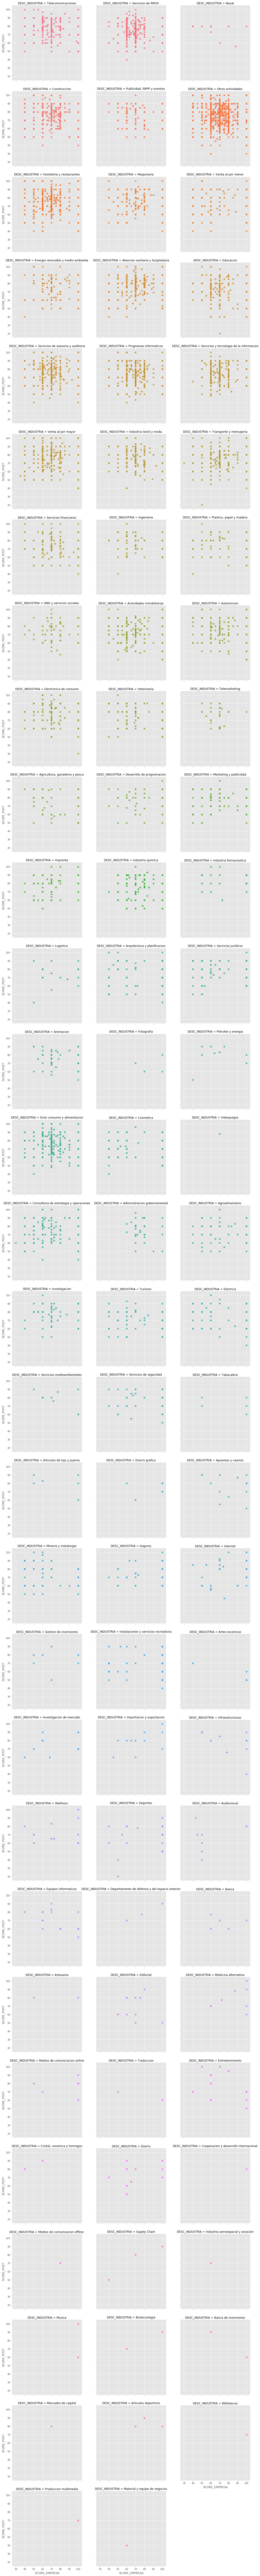

In [30]:
sns.lmplot(x='SCORE_EMPRESA', y='SCORE_POST', data= clustering_results,fit_reg=False, 
           col='DESC_INDUSTRIA',hue='DESC_INDUSTRIA', col_wrap=3)
plt.savefig('ScatterPlot_individual_por_sectores.png');